## 로지스틱회귀

In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/classification_data.csv')

In [3]:
df

X1        X2  y
0  -2.056844 -0.752741  0
1   1.760238  1.558517  1
2  -0.447763 -1.554927  1
3   1.008459  0.529517  1
4   0.636547  0.409058  1
..       ...       ... ..
95 -0.129932 -0.797169  0
96  1.426902  1.244639  1
97 -0.582968  1.630750  1
98 -0.619720  1.630840  0
99  1.938929  0.069963  1

[100 rows x 3 columns]

## 클래스에 따라 색깔 구분하기

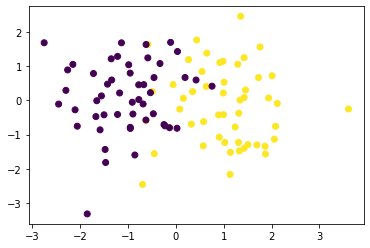

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['X1'],df['X2'],c=df['y'])

## 로지스틱 회귀

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
reg=LogisticRegression()

### 데이터 분할

In [7]:
X = df[['X1','X2']]
y = df['y']
reg.fit(X,y)

LogisticRegression()

## Accuracy

In [8]:
y_pred=reg.predict(X)

In [9]:
y==y_pred

0      True
1      True
2     False
3      True
4      True
      ...  
95    False
96     True
97    False
98     True
99     True
Name: y, Length: 100, dtype: bool

In [10]:
import numpy as np

In [11]:
np.sum(y==y_pred)

89

In [12]:
np.sum(y==y_pred)/y.count()

0.89

## Precision

In [13]:
df['y_pred']=y_pred

In [14]:
df

X1        X2  y  y_pred
0  -2.056844 -0.752741  0       0
1   1.760238  1.558517  1       1
2  -0.447763 -1.554927  1       0
3   1.008459  0.529517  1       1
4   0.636547  0.409058  1       1
..       ...       ... ..     ...
95 -0.129932 -0.797169  0       1
96  1.426902  1.244639  1       1
97 -0.582968  1.630750  1       0
98 -0.619720  1.630840  0       0
99  1.938929  0.069963  1       1

[100 rows x 4 columns]

## Confusion Matrix

In [15]:
df[df['y_pred']==1]
len(df[df['y_pred']==1])

49

### True Positive

In [16]:
df[(df['y_pred']==1)&(df['y']==1)]
tp=len(df[(df['y_pred']==1)&(df['y']==1)])
tp

44

### False Positive

In [17]:
fp=len(df[(df['y_pred']==1)&(df['y']==0)])
fp

5

### True Negative

In [18]:
tn=len(df[(df['y_pred']==0)&(df['y']==0)]) 
tn

45

### False Negative

In [19]:
fn=len(df[(df['y_pred']==0)&(df['y']==1)]) 
fn

6

### Precision

In [20]:
tp/(tp+fp)

0.8979591836734694

### Recall(True Positive Rate)

In [21]:
tp/(tp+fn)

0.88

### False Positive Rate

In [22]:
fp/(fp+tn)

0.1

## sklearn을 이용한 confusion matrix 구하기

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y,y_pred)

array([[45,  5],
       [ 6, 44]])

## decision threashold에 따라 달라지는 예측값 확인

In [25]:
def predict_th(logreg, th=0.5):
    result=[]
    for i in logreg.predict_proba(X)[:,1]:
        if i>th:
            result.append(1)
        else:
            result.append(0)
    return np.array(result)

y_hat=predict_th(reg,0.8)
y_hat

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [26]:
confusion_matrix(y,y_hat)

array([[49,  1],
       [14, 36]])

## ROC_AUC

In [27]:
def get_tpr_fpr(logreg, th, y):
    y_hat = predict_th(logreg,th)
    cm = confusion_matrix(y,y_hat)
    tp,fp,tn,fn = cm[1][1],cm[0][1],cm[0][0],cm[1][0]
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)
    return tpr,fpr
    

In [28]:
tpr_result=[]
fpr_result=[]
for th in np.arange(0,1,0.05):
    tpr,fpr=get_tpr_fpr(reg,th,y)
    tpr_result.append(tpr)
    fpr_result.append(fpr)
    

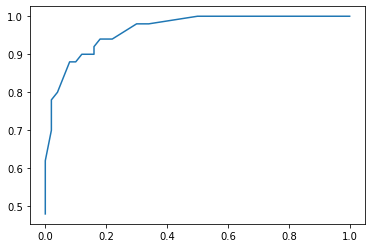

In [29]:
plt.plot(fpr_result,tpr_result)

## Sklearn을 이용하여 계산하기

In [33]:
from sklearn.metrics import roc_auc_score

In [35]:
roc_auc_score(y,reg.predict_proba(X)[:,1])

0.9672000000000001